# QFT Visualization

**Companion notebook for:** [`what-qft-actually-does.md`](./what-qft-actually-does.md)

This notebook demonstrates:
- What the Quantum Fourier Transform actually does
- How it distributes information into phase
- Comparing QFT to classical Fourier Transform conceptually
- Building QFT circuits in Qiskit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.circuit.library import QFT

np.set_printoptions(precision=3, suppress=True)

## 1. QFT on a Single Qubit = Hadamard

The simplest case: 1-qubit QFT is just the H gate.

In [2]:
# Manual 1-qubit QFT
qc_manual = QuantumCircuit(1)
qc_manual.h(0)

# Using Qiskit's QFT
qc_qft = QuantumCircuit(1)
qc_qft.append(QFT(1), [0])

# Compare
state_manual = Statevector(qc_manual)
state_qft = Statevector(qc_qft)

print("Manual H gate:", state_manual.data)
print("QFT(1):       ", state_qft.data)
print("\n→ They're the same!")
print("→ 1-qubit QFT is literally just Hadamard.")

Manual H gate: [0.707+0.j 0.707+0.j]
QFT(1):        [0.707+0.j 0.707+0.j]

→ They're the same!
→ 1-qubit QFT is literally just Hadamard.


/tmp/ipykernel_120986/312154046.py:7: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc_qft.append(QFT(1), [0])


## 2. QFT Distributes Information into Phase

Let's see how QFT transforms basis states.

In [3]:
# Apply QFT to each basis state of a 3-qubit system
n_qubits = 3

print("Applying QFT to basis states:\n")
for i in range(2**n_qubits):
    # Create basis state |i⟩
    qc = QuantumCircuit(n_qubits)
    for bit_pos, bit in enumerate(format(i, f'0{n_qubits}b')[::-1]):
        if bit == '1':
            qc.x(bit_pos)
    
    # Apply QFT
    qc.append(QFT(n_qubits), range(n_qubits))
    
    state = Statevector(qc)
    print(f"QFT|{i}⟩ = {state.data[:4]}...")

print("\n→ QFT creates equal superposition with specific phases")
print("→ The phases encode the original basis state number")

Applying QFT to basis states:

QFT|0⟩ = [0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j]...
QFT|1⟩ = [ 0.354+0.j     0.25 +0.25j   0.   +0.354j -0.25 +0.25j ]...
QFT|2⟩ = [ 0.354+0.j     0.   +0.354j -0.354+0.j    -0.   -0.354j]...
QFT|3⟩ = [ 0.354+0.j    -0.25 +0.25j  -0.   -0.354j  0.25 +0.25j ]...
QFT|4⟩ = [ 0.354+0.j -0.354+0.j  0.354+0.j -0.354+0.j]...
QFT|5⟩ = [ 0.354+0.j    -0.25 -0.25j   0.   +0.354j  0.25 -0.25j ]...
QFT|6⟩ = [ 0.354+0.j    -0.   -0.354j -0.354+0.j     0.   +0.354j]...
QFT|7⟩ = [ 0.354+0.j     0.25 -0.25j  -0.   -0.354j -0.25 -0.25j ]...

→ QFT creates equal superposition with specific phases
→ The phases encode the original basis state number


/tmp/ipykernel_120986/4052243346.py:13: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits), range(n_qubits))


## 3. Building a 2-Qubit QFT Manually

Understanding the circuit structure.

In [4]:
def manual_qft_2():
    qc = QuantumCircuit(2)
    
    # Qubit 0
    qc.h(0)
    qc.cp(np.pi/2, 1, 0)  # Controlled phase rotation
    
    # Qubit 1
    qc.h(1)
    
    # Swap to match Qiskit's ordering
    qc.swap(0, 1)
    
    return qc

# Compare manual vs library
qc_manual = manual_qft_2()
qc_library = QuantumCircuit(2)
qc_library.append(QFT(2), [0, 1])

print("Manual 2-qubit QFT:")
print(qc_manual.draw(output='text'))

print("\nLibrary QFT(2):")
print(qc_library.draw(output='text'))

# Test on |01⟩
test = QuantumCircuit(2)
test.x(0)
test.append(QFT(2), [0, 1])
state = Statevector(test)

print("\nQFT|01⟩ =", state.data)
print("\nKey insight: Controlled phase rotations create phase relationships.")

Manual 2-qubit QFT:
     ┌───┐                 
q_0: ┤ H ├─■─────────────X─
     └───┘ │P(π/2) ┌───┐ │ 
q_1: ──────■───────┤ H ├─X─
                   └───┘   

Library QFT(2):
     ┌──────┐
q_0: ┤0     ├
     │  QFT │
q_1: ┤1     ├
     └──────┘

QFT|01⟩ = [ 0.5+0.j   0. +0.5j -0.5+0.j  -0. -0.5j]

Key insight: Controlled phase rotations create phase relationships.


/tmp/ipykernel_120986/3924329382.py:19: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc_library.append(QFT(2), [0, 1])
/tmp/ipykernel_120986/3924329382.py:30: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  test.append(QFT(2), [0, 1])


## 4. Inverse QFT

QFT is reversible - we can get our original state back.

In [5]:
# Start with basis state |3⟩
qc = QuantumCircuit(3)
qc.x([0, 1])  # |011⟩ = |3⟩
state_original = Statevector(qc)

# Apply QFT
qc.append(QFT(3), range(3))
state_qft = Statevector(qc)

# Apply inverse QFT
qc.append(QFT(3, inverse=True), range(3))
state_back = Statevector(qc)

print("Original |3⟩:     ", state_original.data)
print("After QFT:        ", state_qft.data[:4], "...")
print("After QFT†:       ", state_back.data)

print("\n→ QFT† undoes QFT")
print("→ This is essential for extracting results in algorithms")

Original |3⟩:      [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
After QFT:         [ 0.354+0.j    -0.25 +0.25j  -0.   -0.354j  0.25 +0.25j ] ...
After QFT†:        [ 0.+0.j  0.-0.j  0.+0.j  1.-0.j -0.-0.j  0.+0.j -0.-0.j  0.+0.j]

→ QFT† undoes QFT
→ This is essential for extracting results in algorithms


/tmp/ipykernel_120986/1450821197.py:7: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3), range(3))
/tmp/ipykernel_120986/1450821197.py:11: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3, inverse=True), range(3))


## 5. Visualizing Phase Encoding

See how different inputs create different phase patterns.

/tmp/ipykernel_120986/299078888.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits), range(n_qubits))
/tmp/ipykernel_120986/299078888.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_qubits), range(n_qubits))
/tmp/ipykernel_120986/299078888.py:23: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


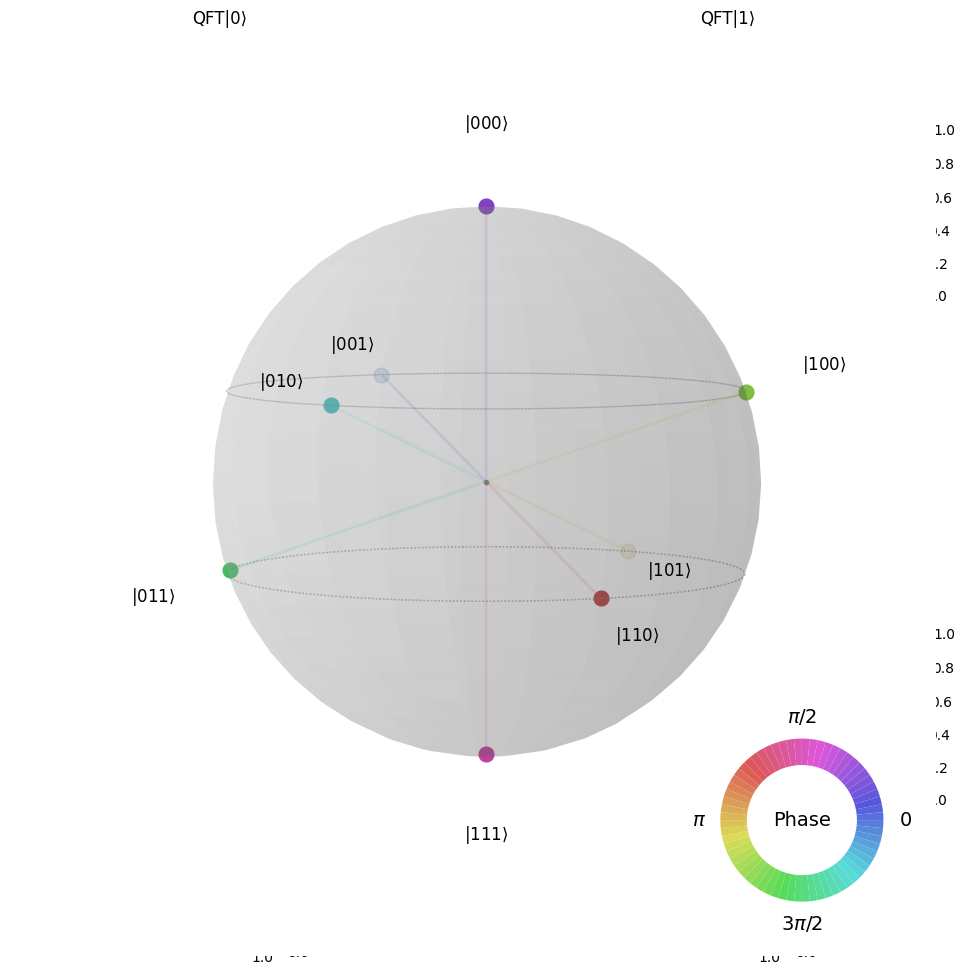

Each input creates a unique phase pattern.
The 'color wheel' on the Q-sphere shows phase relationships.


: 

In [ ]:
n_qubits = 3
test_inputs = [0, 1, 3, 7]

fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for idx, val in enumerate(test_inputs):
    qc = QuantumCircuit(n_qubits)
    
    # Prepare |val⟩
    for bit_pos, bit in enumerate(format(val, f'0{n_qubits}b')[::-1]):
        if bit == '1':
            qc.x(bit_pos)
    
    # Apply QFT
    qc.append(QFT(n_qubits), range(n_qubits))
    state = Statevector(qc)
    
    # Visualize
    plot_state_qsphere(state, ax=axes[idx])
    axes[idx].set_title(f'QFT|{val}⟩', fontsize=12)

plt.tight_layout()
plt.show()

print("Each input creates a unique phase pattern.")
print("The 'color wheel' on the Q-sphere shows phase relationships.")

## Summary

From this notebook, you should understand:

1. **QFT redistributes information** — from basis states to phase patterns
2. **1-qubit QFT = H gate** — the simplest case
3. **Controlled phase rotations** — build up the QFT layer by layer
4. **Inverse QFT** — extract phase information back to basis states
5. **Phase encoding** — different inputs create different patterns

QFT doesn't compute anything by itself.  
It **organizes information** so interference can extract structure.

**Next:** [QFT Addition](./qft-addition.ipynb)  
Where we'll use QFT to add numbers in phase space.